### Perform Forecasts with a Multilayer Perceptron Neural Network. 

In [1]:
import tensorflow 
print('Tensorflow Version : ', tensorflow.__version__)

Tensorflow Version :  2.15.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [3]:
# load the data 
trs = pd.read_csv("data/transactions.csv")
trs['date'] = pd.to_datetime(trs['date'])
trs['date'] = pd.to_datetime(trs['date'])
t2day = trs['date'].value_counts().sort_values()
t2day = t2day.to_frame()
series = X = t2day.date.sort_index().values

AttributeError: 'DataFrame' object has no attribute 'date'

### Visualizing data 

AttributeError: 'DataFrame' object has no attribute 'date'

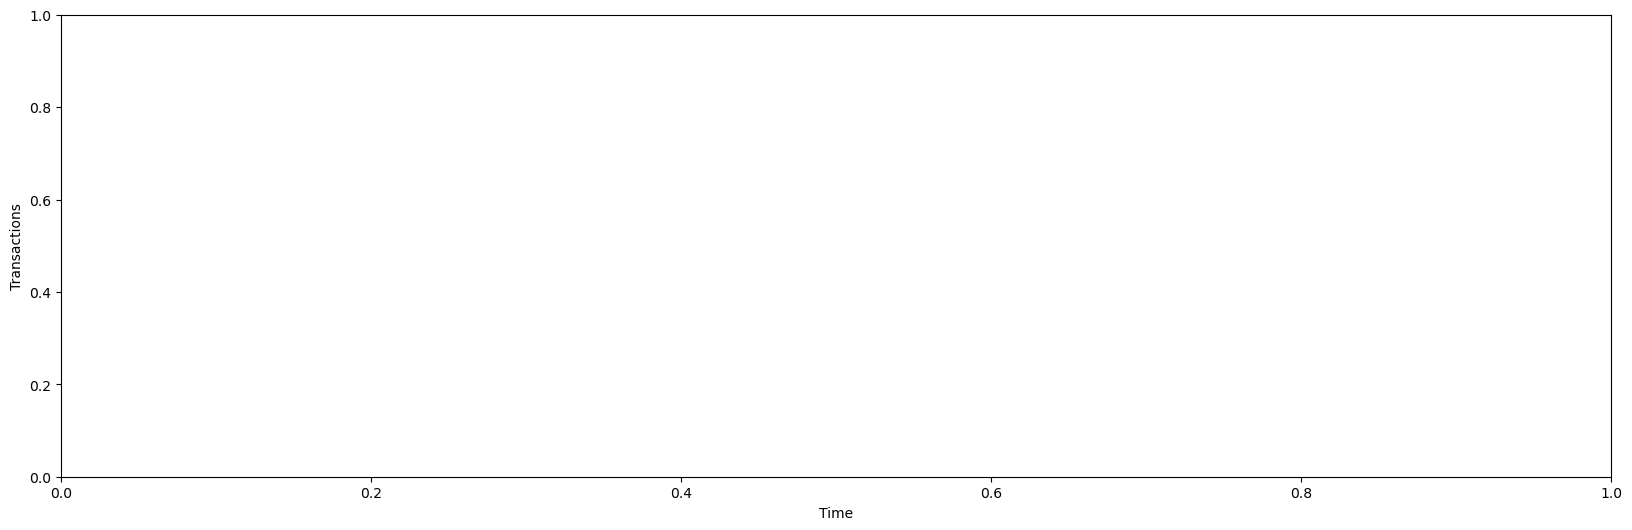

In [4]:
plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Transactions")

plt.plot(t2day.date.sort_index())
plt.show()

### How to prepare the data for the neural network. 

<img src = "img/Multistep.png" alt="Girl in a jacket" width="600" height="800">

In [5]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
         # find the end of this pattern
         end_ix = i + n_steps_in
         out_end_ix = end_ix + n_steps_out
         # check if we are beyond the sequence
         if out_end_ix > len(sequence):
             break
         # gather input and output parts of the pattern
         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
         X.append(seq_x)
         y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
# choose a number of time steps
n_steps_in, n_steps_out = 90,30

# split into samples
X, y = split_sequence(series, n_steps_in, n_steps_out)
count = 0
for i in range(len(X)):
    print(series[i],X[i], y[i])
    count +=1
    if count>7: break

NameError: name 'series' is not defined

In [7]:
print(X.shape)
print(y.shape)

NameError: name 'X' is not defined

In [8]:
train_size = 800
test_size = 223

train_X, test_X = X[:train_size], X[train_size:] 
train_y, test_y = y[:train_size], y[train_size:]


NameError: name 'X' is not defined

In [9]:
# define model
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=n_steps_in)) 
model.add(Dense(250, activation='relu', input_dim=n_steps_in)) 
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse' , metrics=[metrics.mae])

# fit model
history = model.fit(train_X, train_y, batch_size=128, epochs=250, verbose=2)

2024-08-07 19:52:17.165739: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-07 19:52:17.165774: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-08-07 19:52:17.165782: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-08-07 19:52:17.165860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-07 19:52:17.165912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


NameError: name 'train_X' is not defined

Epoch 232/250
7/7 - 0s - loss: 702.7983 - mean_absolute_error: 18.1821
Epoch 233/250
7/7 - 0s - loss: 685.0359 - mean_absolute_error: 17.9823
Epoch 234/250
7/7 - 0s - loss: 661.2729 - mean_absolute_error: 17.6739
Epoch 235/250
7/7 - 0s - loss: 639.1098 - mean_absolute_error: 17.4186
Epoch 236/250
7/7 - 0s - loss: 642.6625 - mean_absolute_error: 17.4547
Epoch 237/250
7/7 - 0s - loss: 625.7866 - mean_absolute_error: 17.2091
Epoch 238/250
7/7 - 0s - loss: 633.4671 - mean_absolute_error: 17.3104
Epoch 239/250
7/7 - 0s - loss: 633.5286 - mean_absolute_error: 17.3217
Epoch 240/250
7/7 - 0s - loss: 640.5579 - mean_absolute_error: 17.3887
Epoch 241/250
7/7 - 0s - loss: 647.8394 - mean_absolute_error: 17.5136
Epoch 242/250
7/7 - 0s - loss: 651.3715 - mean_absolute_error: 17.6025
Epoch 243/250
7/7 - 0s - loss: 693.9590 - mean_absolute_error: 18.1848
Epoch 244/250
7/7 - 0s - loss: 639.2991 - mean_absolute_error: 17.4002
Epoch 245/250
7/7 - 0s - loss: 615.8629 - mean_absolute_error: 17.1902
Epoch 

In [10]:
history.history

NameError: name 'history' is not defined

### Monitor the training process to avoid overfitting of the model.  

- The neural network may learn the data so well that its learning goes into overfitting. 

- To prevent this, you should monitor the training process 

- The curve of validation should follow the curve of training otherwise you should stop the training with EarlyStop.

- The parameters of the model (like number of levels, number of neurons per level, optimizer function etc..) are not optimized 

In [11]:
plt.figure(figsize = (20, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE ')
plt.xlabel('Number of epochs')
plt.legend(["MAE", "Loss"], loc ="upper right")
plt.show()

NameError: name 'history' is not defined

<Figure size 2000x400 with 0 Axes>

### Show the first prediction 

In [23]:
# the number of elements inside numpy array should be the same as n_steps_in
x_input = np.array([ 8,  3 , 7 , 4,  1,  5, 11,  8,  1,  7 , 1,  2, 4 , 1 ,12,  6,  6 , 4,  4 , 2 , 6 , 6 , 7,  6,
                     1,  7 , 7 , 5 , 3 , 9 , 2 , 8 , 3 , 3,  8 , 6 , 3 , 1,  4, 12,  2,  2, 7 , 4,  2 , 9 , 8, 12,
                     7 , 2 , 4 , 4 , 7 , 2 , 4 , 5 , 4 , 1,  6 ,11 , 8 , 3, 10, 10 ,10, 10,  3 , 6 , 4,  4,  4,  7,
                     5 , 6 ,11 , 3 , 1, 10,  6,  1,  6 , 6 , 5 , 1,  4 , 1 , 2 , 7, 13 , 8 , 7 , 7 ,17 , 3,  2 , 7,
                     2 , 2 ,10 , 1,  4,  4 , 3 , 3 , 7 ,10 , 2, 3 , 5 , 1 , 2, 13, 10 , 8,  3 , 6 , 6 ,13,  4, 13,
                     2 , 1 ,10 ,16 , 5,  7,  7, 13 , 8,  2,  6, 20,  2,  4 , 8 ,13 ,10 , 9 , 1,  2 , 4, 19, 16 , 6,
                     5 , 5, 6 ,12 , 7 ,12 ,18 , 7 , 2, 16 ,11 , 9,  8 ,13  ,6 ,16 ,12,  5, 12, 13,  4 ,13, 15, 15,
                     16 ,10, 10,  8 , 6  ,5  ,7 , 2, 17, 12,16, 12])

In [24]:
# transform and predict.
x_input = x_input.reshape((1, n_steps_in))
yhat = model.predict(x_input, verbose=2)
print(yhat[0])

#12 25 28  4 15  1  6 24  6  2  6 16  5  4  9 15  3  2 20 12 15  8  8  8  4 13  9 12 15 11

1/1 - 0s
[13.623101 12.278589 11.534099 15.552346 15.09316  15.910137 11.253327
 18.928581 14.791898 15.21431  15.148912 13.838738 10.954141 11.312092
 13.428771 11.186857 18.290537 18.310802 17.669674 12.879218 14.562765
 15.820354 12.767557 20.731087 16.843094 15.589421 17.329185 12.392403
 20.526594 21.600033]


In [42]:
# predict and compute error
expected = test_y
predicted = []
for i in range(len(test_X)):
    x_input = test_X[i].reshape((1, n_steps_in)) # + 1 per la nuova feature aggiunta
    yhat = model.predict(x_input, verbose=0)
  
    predicted.append(np.around(yhat[0], decimals=1)) 

<class 'numpy.ndarray'>
313 30


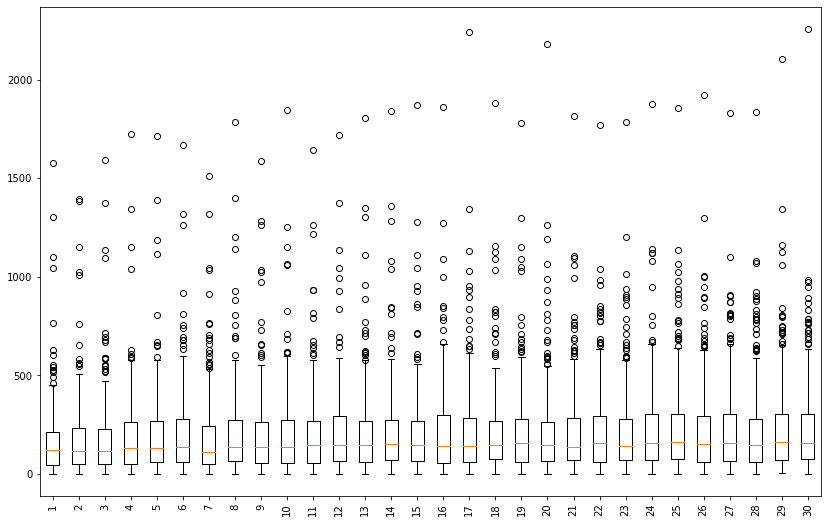

In [43]:
difference = abs(expected - predicted)
print(type(difference))
print(difference.shape[0], difference.shape[1])

# comment line below to see all the boxplots for every number of steps from 1 to n_steps_out
#difference =  np.reshape(difference, difference.shape[0] * difference.shape[1])

plt.figure(figsize = (14, 9))
#plt.boxplot(one_cell['nr_people'].values, vert = False)
plt.boxplot(difference, vert= True);
plt.xticks( rotation='vertical')
plt.show()

### Compute the forecasting Error

Mean error 203.29120345059803


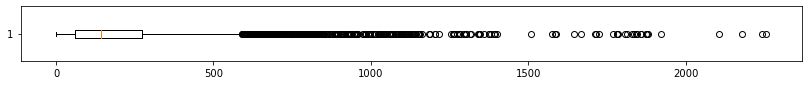

In [44]:
mean_error =  np.reshape(difference, difference.shape[0] * difference.shape[1])
print('Mean error', np.mean(mean_error))
plt.figure(figsize = (14,1))
plt.boxplot(mean_error, vert= False);
plt.show()